In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [15]:
"""The purpose of this project is to create an image classification model that can recognize lowercase cursive letters from images drawn by 
different students. Each student submitted images of letters from ‘a’ to ‘z’. The goal is to train a system that can accurately identify 
which letter appears in any given cursive image. This work allows us to examine handwriting recognition in a practical context, where
natural differences in individual handwriting are captured. In the future, we can expand the model for educational technology uses, like 
grading handwritten assignments or developing assistive handwriting software."""

'The purpose of this project is to create an image classification model that can recognize lowercase cursive letters from images drawn by \ndifferent students. Each student submitted images of letters from ‘a’ to ‘z’. The goal is to train a system that can accurately identify \nwhich letter appears in any given cursive image. This work allows us to examine handwriting recognition in a practical context, where\nnatural differences in individual handwriting are captured. In the future, we can expand the model for educational technology uses, like \ngrading handwritten assignments or developing assistive handwriting software.'

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [33]:
import os
from PIL import Image
import pillow_heif

base_path = "/home/jupyter-1000790/ML-AI/Project_5 - Letter Predictor/cursive_letters"
skip_folders = {"S4", "S7", "S8", "S10", "S11", "S12", "S16", "S19", "S20", "S21","S27","S30"}

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    if folder_name in skip_folders:
        print(f"Skipping {folder_name}")
        continue

    print(f"Processing folder: {folder_name}")

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".heic"):
            heic_path = os.path.join(folder_path, filename)
            jpg_path = os.path.splitext(heic_path)[0] + ".jpg"

            try:
                heif_file = pillow_heif.read_heif(heic_path)
                image = Image.frombytes(
                    heif_file.mode,
                    heif_file.size,
                    heif_file.data
                )

                if image.mode in ("RGBA", "LA"):
                    background = Image.new("RGB", image.size, (255, 255, 255))
                    background.paste(image, mask=image.split()[-1])
                    image = background
                else:
                    image = image.convert("RGB")

                image.save(jpg_path, format="JPEG", quality=95)
                print(f"Converted: {filename} → {os.path.basename(jpg_path)}")

                os.remove(heic_path)
                print(f"Deleted original HEIC: {filename}")

            except Exception as e:
                print(f"Error converting {filename} in {folder_name}: {e}")

print("All conversions complete for selected folders.")
"""The data was provided to me, but I had to clean the data such that all files were congruent. Thus, I ran this script to change all of
them to JPEG files"""

Skipping S19
Processing folder: .ipynb_checkpoints
Skipping S11
Skipping S10
Processing folder: S26
Skipping S16
Processing folder: S17
Processing folder: S15
Processing folder: S14
Skipping S21
Processing folder: S2
Processing folder: S3
Skipping S27
Processing folder: S1
Processing folder: S23
Skipping S4
Skipping S30
Processing folder: S9
Processing folder: S13
Processing folder: S5
Skipping S7
Processing folder: S31
Processing folder: S24
Error converting n.HEIC in S24: Invalid input: No 'ftyp' box: File does not start with 'ftyp' box.
Processing folder: S6
All conversions complete for selected folders.


'The data was provided to me, but I had to clean the data such that all files were congruent. Thus, I ran this script to change all of\nthem to JPEG files'

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

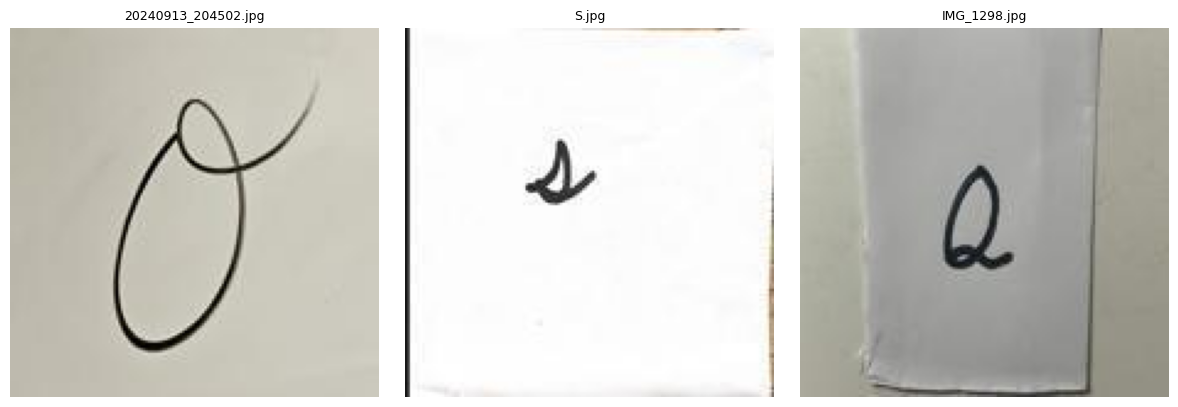

"Here, I'm just creating a way by which I can view the data for myself, and try to see if there are resemblances between the different\nphotos. To me, it appears that resizing some of them could be useful for the future when it comes time to make the model"

In [31]:
from pathlib import Path
import random
import matplotlib.pyplot as plt
from PIL import Image

root = "/home/jupyter-1000790/ML-AI/Project_5 - Letter Predictor/cursive_letters"  
imgs = list(Path(root).rglob("*.jpg")) + list(Path(root).rglob("*.JPG"))
picks = random.sample(imgs, k=min(3, len(imgs)))

plt.figure(figsize=(12, 4))
for i, p in enumerate(picks, 1):
    with Image.open(p) as im:
        ax = plt.subplot(1, len(picks), i)
        ax.imshow(im)
        ax.set_title(p.name, fontsize=9)
        ax.axis("off")

plt.tight_layout()
plt.show()

"""Here, I'm just creating a way by which I can view the data for myself, and try to see if there are resemblances between the different
photos. To me, it appears that resizing some of them could be useful for the future when it comes time to make the model"""

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [30]:
import os
from PIL import Image
from pathlib import Path
import random

base_path = "/home/jupyter-1000790/ML-AI/Project_5 - Letter Predictor/cursive_letters"

all_jpeg_paths = []

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    if not os.path.isdir(folder_path):
        continue

    print(f"Processing folder: {folder_name}")

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            all_jpeg_paths.append(img_path) 
            try:
                with Image.open(img_path) as img:
                    img_resized = img.resize((150, 150))
                    img_resized.save(img_path)  
                print(f"Resized: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

print("All images resized to 150x150.")

"""Here, the final data transformation I am applying, is resizing the images for uniformity. In doing so, I will make it so that letter 
detection will be much more simplified when it comes time to making the neural network and the model in general."""

Processing folder: S19
Resized: N.jpg
Resized: A.jpg
Resized: B.jpg
Resized: C.jpg
Resized: K.jpg
Resized: I.jpg
Resized: S.jpg
Resized: M.jpg
Error processing D.jpg: cannot identify image file '/home/jupyter-1000790/ML-AI/Project_5 - Letter Predictor/cursive_letters/S19/D.jpg'
Resized: Z.jpg
Resized: Q.jpg
Resized: H.jpg
Resized: U.jpg
Resized: E.jpg
Resized: W.jpg
Resized: G.jpg
Resized: O.jpg
Resized: P.jpg
Resized: F.jpg
Resized: R.jpg
Resized: Y.jpg
Resized: J.jpg
Resized: T.jpg
Resized: X.jpg
Error processing L.jpg: cannot identify image file '/home/jupyter-1000790/ML-AI/Project_5 - Letter Predictor/cursive_letters/S19/L.jpg'
Resized: V.jpg
Processing folder: .ipynb_checkpoints
Processing folder: S11
Resized: d.jpg
Resized: p.jpg
Resized: t.jpg
Resized: a.jpg
Resized: o.jpg
Resized: j.jpg
Resized: e.jpg
Resized: i.jpg
Resized: m.jpg
Resized: k.jpg
Resized: v.jpg
Resized: x.jpg
Resized: c.jpg
Resized: z.jpg
Resized: f.jpg
Resized: q.jpg
Resized: h.jpg
Resized: r.jpg
Resized: u.jpg

'Here, the final data transformation I am applying, is resizing the images for uniformity. In doing so, I will make it so that letter \ndetection will be much more simplified when it comes time to making the neural network and the model in general.'

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


Total images: 596
Loaded cached features.
Feature matrix shape: (592, 1764)
Model scores: {'KNN': 3.93, 'LinearSVC': 19.1, 'LogReg': 18.54, 'DT': 14.04}
Chosen model: LinearSVC
Best model saved.


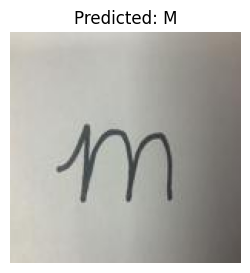

In [28]:
from pathlib import Path
import numpy as np
from PIL import Image, ImageOps
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
import os

ROOT = Path("/home/jupyter-1000790/ML-AI/Project_5 - Letter Predictor/cursive_letters")
SKIP_FOLDERS = {"S8","S12","S18","S20","S22","S25","S28","S29"}
CACHE_DIR = Path("artifacts"); CACHE_DIR.mkdir(parents=True, exist_ok=True)
FEATURES_FILE = CACHE_DIR / "supervised_hog_features.npz"
MODEL_FILE = CACHE_DIR / "best_model.joblib"
IMAGE_SIZE = (64,64)
letters = [chr(ord('A') + i) for i in range(26)] 

all_paths = []
all_labels = []

for folder in sorted(ROOT.iterdir()):
    if not folder.is_dir(): continue
    if folder.name in SKIP_FOLDERS: continue

    imgs = sorted([f for f in folder.iterdir() if f.suffix.lower() in (".jpg",".jpeg",".png")])
    if len(imgs) != 26:
        print(f"Warning: folder {folder.name} has {len(imgs)} images (expected 26)")

    for i, img_path in enumerate(imgs):
        if i >= 26:
            break
        all_paths.append(img_path)
        all_labels.append(letters[i])

print(f"Total images: {len(all_paths)}")

def extract_hog(p, size=IMAGE_SIZE):
    try:
        img = Image.open(p).convert("L")
        img = ImageOps.autocontrast(img)
        img = img.resize(size, Image.BILINEAR)
        arr = np.asarray(img, dtype=np.float32) / 255.0
        if arr.mean() < 0.5: arr = 1.0 - arr
        feat = hog(arr,
                   orientations=9,
                   pixels_per_cell=(8,8),
                   cells_per_block=(2,2),
                   block_norm="L2-Hys",
                   feature_vector=True)
        return feat.astype(np.float32)
    except:
        return None

if FEATURES_FILE.exists():
    data = np.load(FEATURES_FILE, allow_pickle=True)
    X = data['X']
    y = data['y']
    print("Loaded cached features.")
else:
    feats = []
    valid_labels = []
    for path, label in zip(all_paths, all_labels):
        f = extract_hog(path)
        if f is not None:
            feats.append(f)
            valid_labels.append(label)
    X = np.stack(feats)
    y = np.array(valid_labels)
    np.savez_compressed(FEATURES_FILE, X=X, y=y)
    print(f"Saved {len(X)} feature vectors.")

print("Feature matrix shape:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "LinearSVC": LinearSVC(dual=False, C=1.0, max_iter=5000),
    "LogReg": LogisticRegression(max_iter=3000, solver="lbfgs", n_jobs=-1),
    "DT": DecisionTreeClassifier(max_depth=40, random_state=42)
}
scores = {}
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc
best_name = max(scores, key=scores.get)
best_model = models[best_name]
print("Model scores:", {k: round(v*100,2) for k,v in scores.items()})
print("Chosen model:", best_name)
joblib.dump(best_model, MODEL_FILE)
print("Best model saved.")

def predict_letter(img_path):
    if not MODEL_FILE.exists():
        print("No trained model found. Run training first.")
        return None
    model = joblib.load(MODEL_FILE)
    feat = extract_hog(img_path)
    if feat is None:
        print("Failed to extract features from", img_path)
        return None
    feat = feat.reshape(1,-1)
    letter = model.predict(feat)[0]
    return letter
    
def show_prediction(img_path):
    pred = predict_letter(img_path)
    img = Image.open(img_path)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {pred}")
    plt.show()
    
example_img = "/home/jupyter-1000790/ML-AI/Project_5 - Letter Predictor/cursive_letters/S6/m.jpg"
show_prediction(example_img)

"""Ultimately, I wanted to try a few different models. But first I had to do a lot in regards to splitting and testing the data, and before that, doing
some more preparation. This mainly consisted of checking each folder had 26 images, and also extracting the features from the photos using HOG. After
doing so, I used this data and tested it on four different models to ensure that I had a broad scope. I tried K-nearest neighbors because I knew that
it could be good for detecting clusters like in this instance for letters. I also tried linearSVC, because I knew that it was quick for larger datasets.
Then, I also tried Logistic Regression as I had used it for the past four projects and it had worked quite well, but this time it didn't really. Then,
finally, I used the Decision Tree Classifier, because I knew it was rudimentary and could show me what nuance was needed to edit the models."""

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 
